In [11]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Checking about the nature of the datasets

In [12]:
train_data = pd.read_csv('/workspaces/AITemplate/Kaggle/Binary Classification with a Bank Churn Dataset/Datasets/train.csv')
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [13]:
test_data = pd.read_csv('/workspaces/AITemplate/Kaggle/Binary Classification with a Bank Churn Dataset/Datasets/test.csv')
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [14]:
#Changing the Geography column to numerical values

train_data["Geography"] = train_data["Geography"].map({"France": 0, "Spain": 1, "Germany": 2})
train_data["Geography"].value_counts()
test_data["Geography"] = test_data["Geography"].map({"France": 0, "Spain": 1, "Germany": 2})
test_data["Geography"].value_counts()

Geography
0    63171
1    23913
2    22939
Name: count, dtype: int64

In [15]:
#Changing the Gender column to numerical values

train_data["Gender"] = train_data["Gender"].map({"Male": 0, "Female": 1})
train_data["Gender"].value_counts()
test_data["Gender"] = test_data["Gender"].map({"Male": 0, "Female": 1})
test_data["Gender"].value_counts()

Gender
0    61942
1    48081
Name: count, dtype: int64

In [16]:
train_data["CreditScore"] = train_data["CreditScore"]/850
test_data["CreditScore"] = test_data["CreditScore"]/850
train_data["Age"] = train_data["Age"]/92
test_data["Age"] = test_data["Age"]/92
train_data["Balance"] = train_data["Balance"]/250898
test_data["Balance"] = test_data["Balance"]/250898
train_data["EstimatedSalary"] = train_data["EstimatedSalary"]/199992
test_data["EstimatedSalary"] = test_data["EstimatedSalary"]/199992
train_data["Tenure"] = train_data["Tenure"]/10
test_data["Tenure"] = test_data["Tenure"]/10
train_data["NumOfProducts"] = train_data["NumOfProducts"]/4
test_data["NumOfProducts"] = test_data["NumOfProducts"]/4
train_data["Geography"] = train_data["Geography"]/2
test_data["Geography"] = test_data["Geography"]/2

In [17]:
train_data.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,0.772299,0.319404,0.435571,0.414412,0.502035,0.221118,0.388614,0.753954,0.497770,0.562897,0.211599
std,47641.3565,7.139782e+04,0.094239,0.403149,0.495833,0.096383,0.280616,0.250371,0.136788,0.430707,0.499997,0.251474,0.408443
min,0.0000,1.556570e+07,0.411765,0.000000,0.000000,0.195652,0.000000,0.000000,0.250000,0.000000,0.000000,0.000058,0.000000
25%,41258.2500,1.563314e+07,0.702353,0.000000,0.000000,0.347826,0.300000,0.000000,0.250000,1.000000,0.000000,0.373203,0.000000
50%,82516.5000,1.569017e+07,0.775294,0.000000,0.000000,0.402174,0.500000,0.000000,0.500000,1.000000,0.000000,0.589764,0.000000
75%,123774.7500,1.575682e+07,0.835294,0.500000,1.000000,0.456522,0.700000,0.478041,0.500000,1.000000,1.000000,0.775793,0.000000
max,165033.0000,1.581569e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000002,1.000000


In [18]:
train_data.drop(["Surname", "id", "CustomerId"], axis=1, inplace=True)

In [19]:
test_data.drop(["Surname", "CustomerId"], axis=1, inplace=True)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  float64
 1   Geography        165034 non-null  float64
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  float64
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  float64
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 13.9 MB


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CreditScore      110023 non-null  float64
 2   Geography        110023 non-null  float64
 3   Gender           110023 non-null  int64  
 4   Age              110023 non-null  float64
 5   Tenure           110023 non-null  float64
 6   Balance          110023 non-null  float64
 7   NumOfProducts    110023 non-null  float64
 8   HasCrCard        110023 non-null  float64
 9   IsActiveMember   110023 non-null  float64
 10  EstimatedSalary  110023 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 9.2 MB


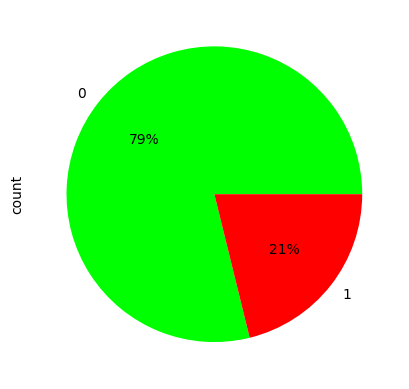

In [22]:
#make a pie chart for the number of Exited and not Exited customers in the training data
train_data["Exited"].value_counts().plot(kind="pie", autopct="%1.0f%%", colors=["#00FF00", "#FF0000"])
plt.show()

In [23]:
"""
#Take out half of the non Exited customers from the training data and put them in a new dataframe
train_data0 = train_data[train_data["Exited"] == 0].sample(frac=0.3, random_state=0)
train_data1 = train_data[train_data["Exited"] == 1]

#Combine the new dataframe with the Exited customers
train_data = pd.concat([train_data0, train_data1], axis=0)

train_data["Exited"].value_counts().plot(kind="pie", autopct="%1.0f%%", colors=["#00FF00", "#FF0000"])
plt.show()
"""

'\n#Take out half of the non Exited customers from the training data and put them in a new dataframe\ntrain_data0 = train_data[train_data["Exited"] == 0].sample(frac=0.3, random_state=0)\ntrain_data1 = train_data[train_data["Exited"] == 1]\n\n#Combine the new dataframe with the Exited customers\ntrain_data = pd.concat([train_data0, train_data1], axis=0)\n\ntrain_data["Exited"].value_counts().plot(kind="pie", autopct="%1.0f%%", colors=["#00FF00", "#FF0000"])\nplt.show()\n'

In [ ]:
# Implementing the model
X_train = train_data.drop(["Exited"], axis=1)
y_train = train_data["Exited"]
X_test = test_data.drop(["id"], axis=1)

In [25]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.[Dense Like Layer]

  def call(self, inputs):
    x = self.dense1(inputs)
    return x

SyntaxError: invalid syntax (510043711.py, line 5)

In [31]:
# Creating a submission file
def make_submission(kaggle_predictions):
    path="/workspaces/AITemplate/Kaggle/Binary Classification with a Bank Churn Dataset/Submissions/Sumbission10.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = pd.DataFrame({
    "id": test_data["id"],
    "Exited": predictions.reshape(-1)

})
make_submission(kaggle_predictions)

Submission exported to /workspaces/AITemplate/Kaggle/Binary Classification with a Bank Churn Dataset/Submissions/Sumbission10.csv
